In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

In [2]:
dftrain=pd.read_csv('deaths_state.csv') # training data
dfeval=pd.read_csv('deaths_state.csv') # testing data
y_train = dftrain.pop('deaths_new')
y_eval = dfeval.pop('deaths_new')





In [3]:
## print the top5 records
dftrain.head()

,date,state,deaths_bird,deaths_new_dod,deaths_bird_dod,deaths_pvax,deaths_fvax,Unnamed: 8
0,17/3/2020,Johor,0,1,0,0,0,NaN
1,17/3/2020,Kedah,0,0,0,0,0,NaN
2,17/3/2020,Kelantan,0,0,0,0,0,NaN
3,17/3/2020,Melaka,0,0,0,0,0,NaN
4,17/3/2020,Negeri Sembilan,0,0,0,0,0,NaN


In [4]:
dftrain.head()

,date,state,deaths_bird,deaths_new_dod,deaths_bird_dod,deaths_pvax,deaths_fvax,Unnamed: 8
0,17/3/2020,Johor,0,1,0,0,0,NaN
1,17/3/2020,Kedah,0,0,0,0,0,NaN
2,17/3/2020,Kelantan,0,0,0,0,0,NaN
3,17/3/2020,Melaka,0,0,0,0,0,NaN
4,17/3/2020,Negeri Sembilan,0,0,0,0,0,NaN


In [5]:
dftrain.describe()

,deaths_bird,deaths_new_dod,deaths_bird_dod,deaths_pvax,deaths_fvax,Unnamed: 8
count,8976.000000,8976.000000,8976.000000,8976.000000,8976.000000,0.0
mean,0.575758,2.889372,0.575758,0.638369,0.225156,NaN
std,3.413760,11.420224,2.861803,3.549634,1.092387,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,1.000000,0.000000,0.000000,0.000000,NaN
max,84.000000,190.000000,61.000000,68.000000,18.000000,NaN


In [6]:
dftrain.shape

(8976, 8)

In [7]:
dftrain.isnull().sum()

date                  0
state                 0
deaths_bird           0
deaths_new_dod        0
deaths_bird_dod       0
deaths_pvax           0
deaths_fvax           0
Unnamed: 8         8976
dtype: int64

In [8]:
y_train.head()

0    1
1    0
2    0
3    0
4    0
Name: deaths_new, dtype: int64

Text(0.5, 0, '% deaths_new')

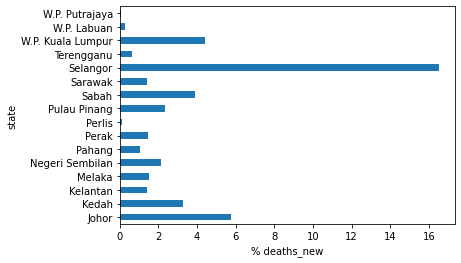

In [9]:
pd.concat([dftrain, y_train], axis=1).groupby('state').deaths_new.mean().plot(kind='barh').set_xlabel('% deaths_new')

Text(0.5, 0, '% deaths_bird ')

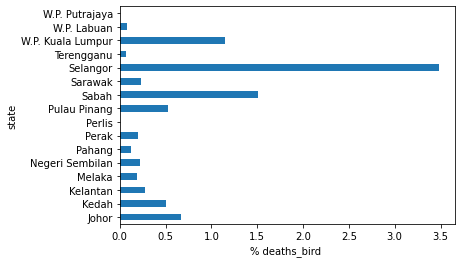

In [10]:
pd.concat([dftrain, y_train], axis=1).groupby('state').deaths_bird .mean().plot(kind='barh').set_xlabel('% deaths_bird ')

Text(0.5, 0, '% deaths_new_dod ')

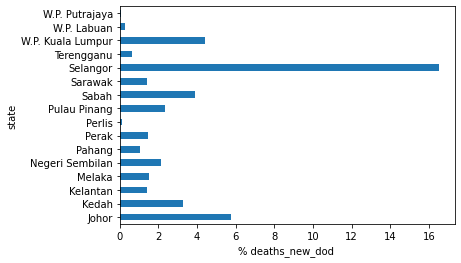

In [11]:
pd.concat([dftrain, y_train], axis=1).groupby('state').deaths_new_dod  .mean().plot(kind='barh').set_xlabel('% deaths_new_dod ')

Text(0.5, 0, '% deaths_bird_dod')

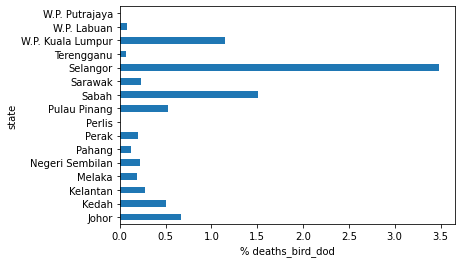

In [12]:
pd.concat([dftrain, y_train], axis=1).groupby('state').deaths_bird_dod .mean().plot(kind='barh').set_xlabel('% deaths_bird_dod')

Text(0.5, 0, '% deaths_pvax  ')

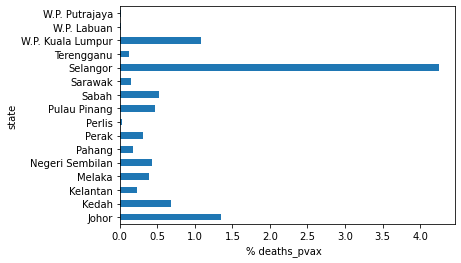

In [13]:
pd.concat([dftrain, y_train], axis=1).groupby('state').deaths_pvax  .mean().plot(kind='barh').set_xlabel('% deaths_pvax  ')

Text(0.5, 0, '% deaths_fvax ')

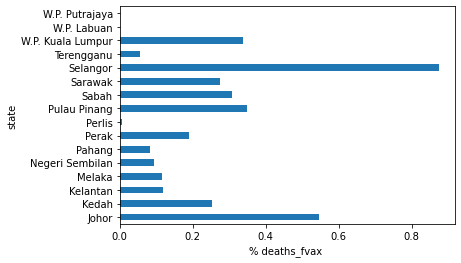

In [14]:
pd.concat([dftrain, y_train], axis=1).groupby('state').deaths_fvax .mean().plot(kind='barh').set_xlabel('% deaths_fvax ')

### Feature Engineering

In [15]:
dftrain.head()

,date,state,deaths_bird,deaths_new_dod,deaths_bird_dod,deaths_pvax,deaths_fvax,Unnamed: 8
0,17/3/2020,Johor,0,1,0,0,0,NaN
1,17/3/2020,Kedah,0,0,0,0,0,NaN
2,17/3/2020,Kelantan,0,0,0,0,0,NaN
3,17/3/2020,Melaka,0,0,0,0,0,NaN
4,17/3/2020,Negeri Sembilan,0,0,0,0,0,NaN


In [16]:
dftrain['Date']=dftrain['date'].str.split('/').str[0]
dftrain['Month']=dftrain['date'].str.split('/').str[1]
dftrain['Year']=dftrain['date'].str.split('/').str[2]

In [17]:
dftrain.head()

,date,state,deaths_bird,deaths_new_dod,deaths_bird_dod,deaths_pvax,deaths_fvax,Unnamed: 8,Date,Month,Year
0,17/3/2020,Johor,0,1,0,0,0,NaN,17,3,2020
1,17/3/2020,Kedah,0,0,0,0,0,NaN,17,3,2020
2,17/3/2020,Kelantan,0,0,0,0,0,NaN,17,3,2020
3,17/3/2020,Melaka,0,0,0,0,0,NaN,17,3,2020
4,17/3/2020,Negeri Sembilan,0,0,0,0,0,NaN,17,3,2020


In [18]:
# Drop the state coulmn
dftrain=dftrain.drop('Unnamed: 8',axis=1)

In [19]:
dftrain.head()

,date,state,deaths_bird,deaths_new_dod,deaths_bird_dod,deaths_pvax,deaths_fvax,Date,Month,Year
0,17/3/2020,Johor,0,1,0,0,0,17,3,2020
1,17/3/2020,Kedah,0,0,0,0,0,17,3,2020
2,17/3/2020,Kelantan,0,0,0,0,0,17,3,2020
3,17/3/2020,Melaka,0,0,0,0,0,17,3,2020
4,17/3/2020,Negeri Sembilan,0,0,0,0,0,17,3,2020


In [20]:
dftrain.dtypes

date               object
state              object
deaths_bird         int64
deaths_new_dod      int64
deaths_bird_dod     int64
deaths_pvax         int64
deaths_fvax         int64
Date               object
Month              object
Year               object
dtype: object

In [21]:
dftrain['Date']=dftrain['Date'].astype(int)
dftrain['Month']=dftrain['Month'].astype(int)
dftrain['Year']=dftrain['Year'].astype(int)

In [22]:
dftrain.dtypes

date               object
state              object
deaths_bird         int64
deaths_new_dod      int64
deaths_bird_dod     int64
deaths_pvax         int64
deaths_fvax         int64
Date                int32
Month               int32
Year                int32
dtype: object

In [23]:
dftrain=dftrain.drop(['date'],axis=1)

In [24]:
dftrain.head()

,state,deaths_bird,deaths_new_dod,deaths_bird_dod,deaths_pvax,deaths_fvax,Date,Month,Year
0,Johor,0,1,0,0,0,17,3,2020
1,Kedah,0,0,0,0,0,17,3,2020
2,Kelantan,0,0,0,0,0,17,3,2020
3,Melaka,0,0,0,0,0,17,3,2020
4,Negeri Sembilan,0,0,0,0,0,17,3,2020


## Feature Columns
In our dataset we have two different kinds of information: Categorical and Numeric

Our categorical data is anything that is not numeric! For example, the state column does not use numbers, it uses the words only

Before we continue and create/train a model we must convet our categorical data into numeric data. We can do this by encoding each category with an integer.

Fortunately for us TensorFlow has some tools to help

In [37]:
CATEGORICAL_COLUMNS = ['state']
NUMERIC_COLUMNS = ['deaths_bird', 'deaths_new_dod','deaths_bird_dod','deaths_pvax','deaths_fvax']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()  # gets a list of all unique values from given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='state', vocabulary_list=('Johor', 'Kedah', 'Kelantan', 'Melaka', 'Negeri Sembilan', 'Pahang', 'Perak', 'Perlis', 'Pulau Pinang', 'Sabah', 'Sarawak', 'Selangor', 'Terengganu', 'W.P. Kuala Lumpur', 'W.P. Labuan', 'W.P. Putrajaya'), dtype=tf.string, default_value=-1, num_oov_buckets=0), NumericColumn(key='deaths_bird', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='deaths_new_dod', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='deaths_bird_dod', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='deaths_pvax', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='deaths_fvax', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


### Training vs Testing Data

### The Training Process
So, we are almost done preparing our dataset and I feel as though it's a good time to explain how our model is trained. Specifically, how input data is fed to our model.

For this specific model data is going to be streamed into it in small batches of 32. This means we will not feed the entire dataset to our model at once, but simply small batches of entries. We will feed these batches to our model multiple times according to the number of epochs.

An epoch is simply one stream of our entire dataset. The number of epochs we define is the amount of times our model will see the entire dataset. We use multiple epochs in hope that after seeing the same data multiple times the model will better determine how to estimate it.

Ex. if we have 10 ephocs, our model will see the same dataset 10 times.

Since we need to feed our data in batches and multiple times, we need to create something called an input function. The input function simply defines how our dataset will be converted into batches at each epoch.

#### Input Function
The TensorFlow model we are going to use requires that the data we pass it comes in as a tf.data.Dataset object. This means we must create a input function that can convert our current pandas dataframe into that object

In [38]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_fn = make_input_fn(dftrain, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

In [39]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
# We create a linear estimtor by passing the feature columns we created earlier

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\User\\AppData\\Local\\Temp\\tmpeoyircre', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


We can use the .predict() method to get deaths_new probabilities from the model. This method will return a list of dicts that store a predicition for each of the entries in our testing data set. Below we've used some pandas magic to plot a nice graph of the predictions.

As you can see the deaths_new rate is not very high

INFO:tensorflow:Could not find trained model in model_dir: C:\Users\User\AppData\Local\Temp\tmpeoyircre, running initialization to predict.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


<AxesSubplot:title={'center':'predicted probabilities'}, ylabel='Frequency'>

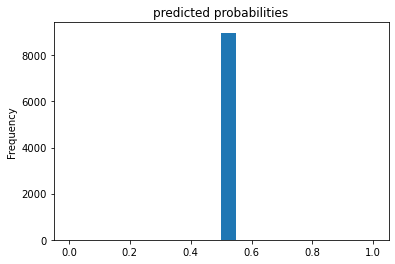

In [43]:
pred_dicts = list(linear_est.predict(eval_input_fn))
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])

probs.plot(kind='hist', bins=20, title='predicted probabilities')